In [54]:
import pandas as pd # read_csv, datetime, DataFrame
import numpy as np # random.normal, sin

from pandas.plotting import autocorrelation_plot as auto_corr

from matplotlib import pyplot as plt # for plotting
import seaborn as sns; sns.set() # for prettier plots / formatting / style

# jupyter cell magic for inline visualization
%matplotlib inline 

# tsa : time series analysis
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose as season
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# metrics
from sklearn import metrics # explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
#from sklearn.utils import check_arrays # converts list-like objects to array (if needed)

from sklearn.model_selection import train_test_split
# scikit-learn models
from sklearn.linear_model import LinearRegression as LinReg

In [25]:
SIZE = (10,6)

In [2]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    plt.figure(figsize=SIZE)
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [3]:
def report_metrics(y_true, y_pred):
    print("Explained Variance:\n\t", metrics.explained_variance_score(y_true, y_pred))
    print("MAE:\n\t", metrics.mean_absolute_error(y_true, y_pred))
    print("RMSE:\n\t", np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
    print("MAPE:\n\t", MAPE(y_true, y_pred))
    print("r^2:\n\t", metrics.r2_score(y_true, y_pred))

In [46]:
data = pd.read_csv("zillow_data.csv") #parse_dates=['Month'], index_col=['Month']
data.head(20)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


In [16]:
clean = data.dropna()

In [45]:
clean.shape

(12895, 272)

In [32]:
#Sort by one region at a time
first_region_info = clean[clean.iloc[2].index[:7]].iloc[2]
first_dates = clean[clean.iloc[2].index[7:]].iloc[2]
first_region_info.head()

RegionID        91982
RegionName      77494
City             Katy
State              TX
Metro         Houston
Name: 2, dtype: object

In [40]:
first_dates = clean[clean.iloc[2].index[7:]].iloc[2].index.dtype
first_dates

dtype('O')

In [43]:
#ACF & PACF plots
def plot_lag(data, nlags):
    lag_acf = acf(data, nlags=nlags)
    lag_pacf = pacf(data, nlags=nlags, method='ols')

    plt.figure(figsize=(20,6))
    #Plot ACF:
    plt.subplot(121)
    plt.plot(lag_acf)
    plt.axhline(y=0, linestyle='--', color='green')
    plt.axhline(y=-1.96/np.sqrt(len(data)), linestyle='--', color='red')
    plt.axhline(y=1.96/np.sqrt(len(data)), linestyle='--', color='red')
    plt.title('ACF')            

    #Plot PACF:
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0, linestyle='--', color='green')
    plt.axhline(y=-1.96/np.sqrt(len(data)), linestyle='--', color='red')
    plt.axhline(y=1.96/np.sqrt(len(data)), linestyle='--', color='red')
    plt.title('PACF')

    plt.tight_layout()
    plt.show()

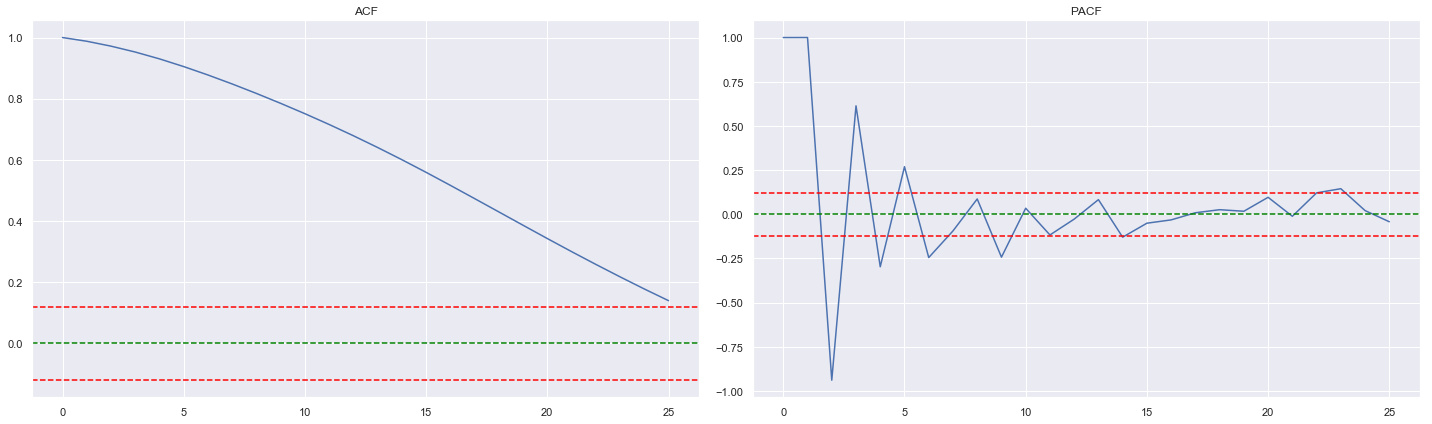

In [33]:
#ACF & PACF plots

lag_acf = acf(first_dates, nlags=25)
lag_pacf = pacf(first_dates, nlags=25, method='ols')

plt.figure(figsize=(20,6))
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='green')
plt.axhline(y=-1.96/np.sqrt(len(first_dates)), linestyle='--', color='red')
plt.axhline(y=1.96/np.sqrt(len(first_dates)), linestyle='--', color='red')
plt.title('ACF')            

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='green')
plt.axhline(y=-1.96/np.sqrt(len(first_dates)), linestyle='--', color='red')
plt.axhline(y=1.96/np.sqrt(len(first_dates)), linestyle='--', color='red')
plt.title('PACF')
            
plt.tight_layout()
plt.show()

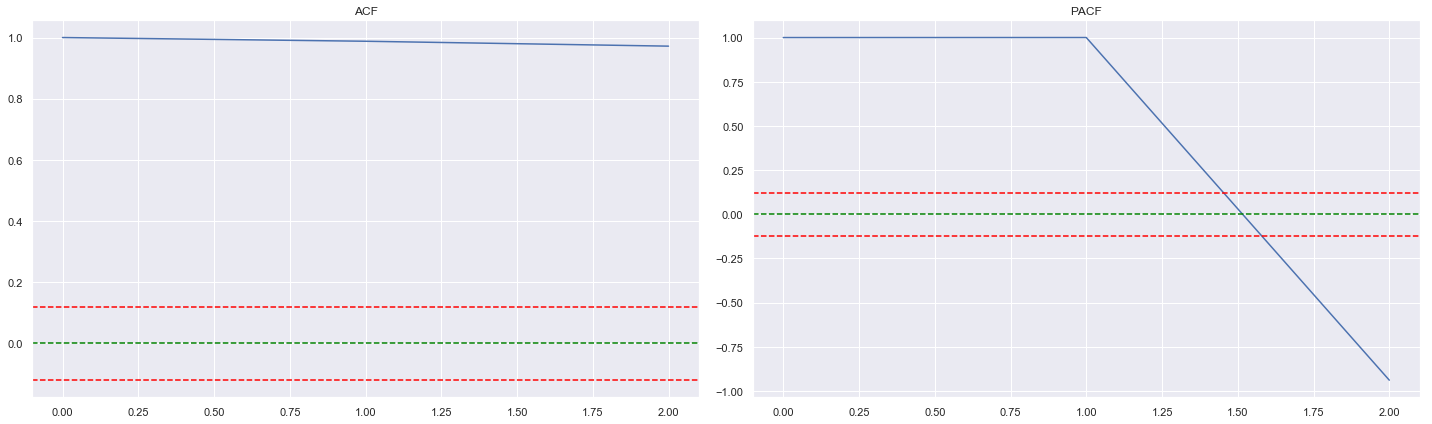

In [44]:
plot_lag(clean[clean.iloc[2].index[7:]].iloc[2], 2)

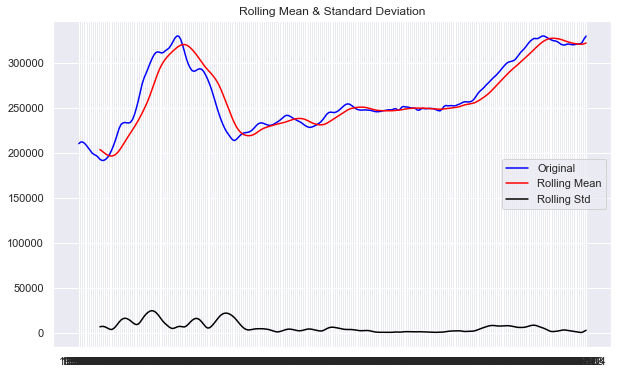

Results of Dickey-Fuller Test:
Test Statistic                  -2.504919
p-value                          0.114282
#Lags Used                       8.000000
Number of Observations Used    256.000000
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
Critical Value (10%)            -2.572822
dtype: float64


In [34]:
test_stationarity(first_dates)

In [85]:
# df = pd.DataFrame(t, columns=['t'])
# df['x'] = x
cutat = int(7 + (len(clean)-7)*.75)
print(cutat, clean.shape)
first_datestest = clean[clean.iloc[2].index[7:]].iloc[2]
clean_train_df = clean.iloc[:,7:cutat]
clean_test_df = clean.iloc[:,cutat:]

9673 (12895, 274)


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#y is the price, clean[clean.iloc[i].index[7:]].iloc[i],
#what would x be? the dates AKA the columns that contain each of those prices?

NameError: name 'X' is not defined

In [82]:
clean_test_df.head()

""
0
1
2
3
4


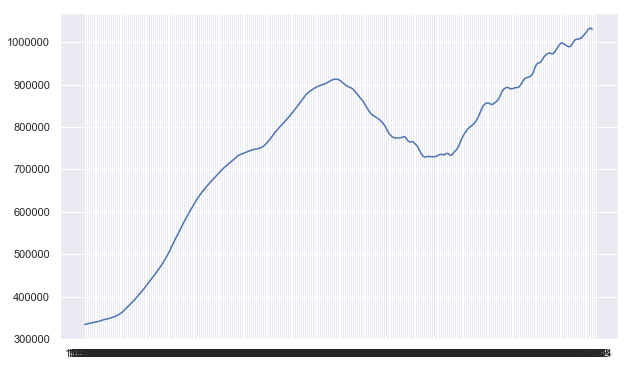

In [83]:
plt.figure(figsize=SIZE)
# clean.train.plot()
# clean.test.plot()
plt.plot(clean_train_df.iloc[0])
plt.plot(clean_test_df.iloc[0])
plt.show()

In [94]:
!tar -xf df_09.tar

In [95]:
df09 = pd.read_csv('df_09.csv')
df09.head()

,Unnamed: 0,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2009-01,2009-02,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,0,84654,60657,Chicago,IL,Chicago,Cook,1,818300.0,814600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,202400.0,201700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,2,91982,77494,Katy,TX,Houston,Harris,3,246700.0,246100.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,3,84616,60614,Chicago,IL,Chicago,Cook,4,1065400.0,1057800.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,4,93144,79936,El Paso,TX,El Paso,El Paso,5,121600.0,121200.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [99]:
lag=1

In [ ]:
#Why all the Nans here?

In [115]:
df09.iloc[:,8:].diff(lag, axis=1).apply(lambda x: abs(np.log(x)))

,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.764053,7.600902,5.703782,7.495542,8.216088,8.594154,8.648221,8.748305,8.039157,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,inf,5.298317,5.298317,4.605170,...,6.907755,7.600902,7.824046,7.377759,6.802395,7.377759,7.313220,7.313220,7.313220,6.551080
2,NaN,NaN,NaN,4.605170,5.703782,6.396930,5.991465,5.991465,5.703782,4.605170,...,4.605170,NaN,NaN,5.298317,5.991465,5.991465,inf,7.495542,8.268732,8.006368
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.684612,NaN,NaN,8.318742,8.536996,7.783224,8.216088,8.216088,7.649693,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.298317,5.703782,6.396930,5.703782,inf,inf,inf,5.298317,6.214608,6.214608
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.605170,4.605170,4.605170,...,5.298317,6.684612,7.313220,7.438384,6.802395,inf,inf,4.605170,6.396930,6.684612
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.703782,...,8.070906,8.630522,8.895630,8.366370,7.377759,7.003065,NaN,NaN,7.495542,8.455318
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.824046,NaN,NaN,NaN,8.006368,inf,6.396930,7.600902,7.740664,inf
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.605170,inf,...,4.605170,6.396930,6.907755,7.090077,7.170120,7.244228,6.907755,6.802395,7.090077,6.684612
9,NaN,8.895630,6.214608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.035987,NaN,9.314700,10.114559,NaN,NaN,NaN,NaN,9.723164,10.425253


In [107]:
#only prices of DF from '09 to the end
df09q = df09.iloc[:,8:]

In [113]:
# Import necessary libraries
from numba import jit
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')


In [114]:
@jit
def log_non_nans(arr, lag):
    n = arr.size
    nan = float("nan")
    for i in prange(n):
#         if arr[i] == 0 or i <= lag or arr[i] == np.nan:
        if i <= lag:
            arr[i] = np.nan
            continue
        if arr[i] == nan:
            arr[i] = np.nan
            continue
        if arr[i] <= 0:
            arr[i] = np.log(-1 * arr[i])
            continue
        arr[i] = np.log(arr[i])
    return arr

In [111]:
#how can I get the 120 columns from df09.iloc[:,8:] to be my datetime index?
df09q = pd.to_datetime(df09q)
df09q.set_index('Date', inplace=True)

# Plot the time-series
df09q.plot(figsize=(15, 6))
plt.show()
print(df09q.head())


ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(CO2,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

In [ ]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

In [ ]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(CO2,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

In [ ]:
# Use plot_diagnostics with results calculated above.
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [ ]:
pred = output.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_conf = pred.conf_int()

In [ ]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = CO2['1990':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [ ]:
# Get the Real and predicted values
CO2_forecasted = pred.predicted_mean
CO2_truth = CO2['1998-01-01':]

# Compute the mean square error
mse = ((CO2_forecasted - CO2_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# The Mean Squared Error of our forecasts is 0.07

In [ ]:
# Get dynamic predictions with confidence intervals as above.
pred_dynamic = output.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

In [ ]:
# Plot the dynamic forecast with confidence intervals.

ax = CO2['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), CO2_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [ ]:
# Extract the predicted and true values of our time series
CO2_forecasted = pred_dynamic.predicted_mean
CO2_truth = CO2['1998-01-01':]

# Compute the mean square error
mse = ((CO2_forecasted - CO2_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# The Mean Squared Error of our forecasts is 1.01

In [ ]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

In [ ]:
# Plot future predictions with confidence intervals

ax = CO2.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()